In [12]:
import oipd.generate_pdf as op

from datetime import datetime
import matplotlib.pyplot as plt

In [13]:
# --- example 1 - NVIDIA --- #

input_csv_path = "data/nvidia_date20250303_strikedate20250516_price11790.csv"
current_price = 117.90
current_date = "2025-03-03"
strike_date = "2025-05-16"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days
print(days_difference)

74


In [18]:
column_mapping={
    "Strike": "strike",
    "Last Price": "last_price",
    "Bid": "bid",
    "Ask": "ask"
    }

nvidia_pdf = op.run(
    input_data=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
    column_mapping=column_mapping
)

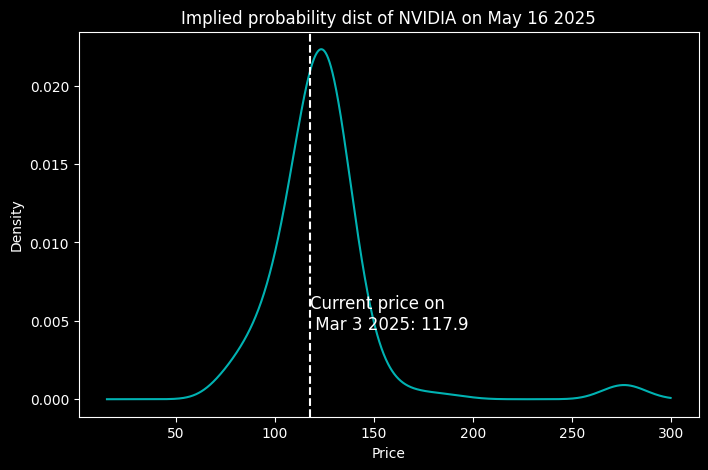

In [19]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(nvidia_pdf.Price, nvidia_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at current price
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(current_price, max(nvidia_pdf.PDF) * 0.3, f"Current price on\n Mar 3 2025: {current_price}", 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of NVIDIA on May 16 2025")
# Show the plot
plt.show()

In [4]:
# --- Example 2 - SPY --- #

input_csv_path = "data/spy_date20250128_strike20250228_price60444.csv"
current_price = 593.83
current_date = "2025-03-03"
strike_date = "2025-05-16"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days

In [5]:
spy_pdf = op.run(
    input_data=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
    column_mapping=column_mapping
)

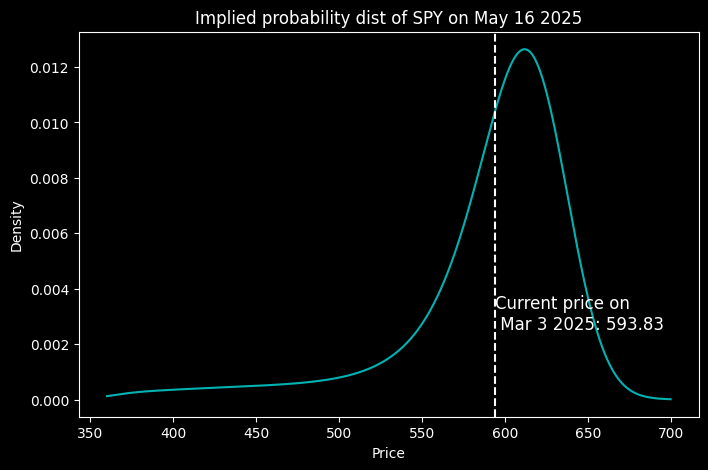

In [6]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(spy_pdf.Price, spy_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at current price
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(current_price, max(spy_pdf.PDF) * 0.3, "Current price on\n Mar 3 2025: "+str(current_price), 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of SPY on May 16 2025")
# Show the plot
plt.show()

In [6]:
# --- Example 3 - US Steel in Mar --- #
input_csv_path = "data/ussteel_date20250303_strike20251219_price3939.csv"
current_price = 39.39
current_date = "2025-03-03"
strike_date = "2025-12-19"
# Convert the strings to datetime objects
current_date_dt = datetime.strptime(current_date, "%Y-%m-%d")
strike_date_dt = datetime.strptime(strike_date, "%Y-%m-%d")
# Calculate the difference in days
days_difference = (strike_date_dt - current_date_dt).days

In [7]:
ussteel_pdf = op.run(
    input_data=input_csv_path,
    current_price=float(current_price),
    days_forward=int(days_difference),
    risk_free_rate=0.03,
    fit_kernel_pdf=True,
    solver_method="brent",
    column_mapping=column_mapping
)

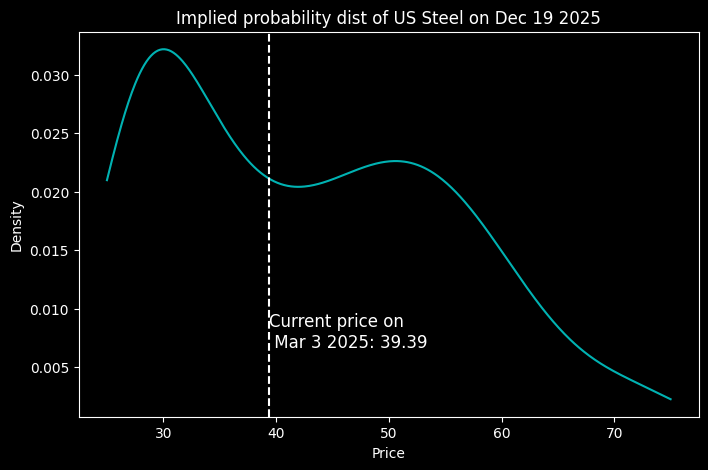

In [8]:
# Plot probability density function
plt.figure(figsize=(8, 5))
plt.plot(ussteel_pdf.Price, ussteel_pdf.PDF, label="Implied PDF", color="cyan", alpha=0.7)
# Add a vertical line at current price
plt.axvline(x=current_price, color="white", linestyle="--")
# Add annotation for clarity
plt.text(current_price, max(ussteel_pdf.PDF) * 0.3, "Current price on\n Mar 3 2025: "+str(current_price), 
         color="white", fontsize=12, ha="left", va="top")
# Labels and title
plt.xlabel("Price")
plt.ylabel("Density")
# plt.legend()
plt.title("Implied probability dist of US Steel on Dec 19 2025")
# Show the plot
plt.show()

In [33]:
ussteel_pdf[ussteel_pdf['Price'] >= 55]

,Price,PDF,CDF
300,55.060120,0.020794,0.767169
301,55.160321,0.020709,0.769249
302,55.260521,0.020623,0.771319
303,55.360721,0.020534,0.773381
304,55.460922,0.020443,0.775434
...,...,...,...
495,74.599198,0.002441,0.961987
496,74.699399,0.002394,0.962230
497,74.799599,0.002347,0.962467
498,74.899800,0.002300,0.962700
